# Walmart - Store Sales Forecasting

## Importing data 

### Importing necessary module

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np 
sns.set()

### Geting directory

In [36]:
os.getcwd()
os.chdir('C:\\Users\\Administrator\\AnacondaProjects\\Walmart project')

### Loading data and displaying 

In [37]:
# loading data
features = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
# displaying data 
print(features.head())
print(train.head())
print(stores.head())


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-1

### Dealing with missing values

In [38]:
print(features.info())
print(train.info())
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 

Aapparently, only features table contains missing value. However, according to data description, 
MarkDown features are anonymized data related to promotional markdowns that Walmart is running. 
MarkDown data is only available after Nov 2011, and is not available for all stores all the time.
Any missing value is marked with an NA. Therefore, the missing values in MarkDown columns can be replaced as 0. 
CPI and Unemployment features are different story. From eyeballing, CPI and unemployment rate are 
cut off at the second quarter of 2013. For the sake of convenient, the latest available data will 
be used to replace NaN.


In [39]:
# replacing NaN in MarkDown with 0
features.loc[:,'MarkDown1':'MarkDown5'] = features.loc[:,'MarkDown1':'MarkDown5'].fillna(value=0)
# replacing NaN in CPI and Unemployment with previuos value 
features[['CPI','Unemployment']] = features[['CPI','Unemployment']].fillna(method = 'ffill')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       8190 non-null float64
MarkDown2       8190 non-null float64
MarkDown3       8190 non-null float64
MarkDown4       8190 non-null float64
MarkDown5       8190 non-null float64
CPI             8190 non-null float64
Unemployment    8190 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


### Merging table

Since the requirement of the client is to predict the sales of each store and department, 
the train data set need to merge with all other features. 

In [40]:
# merging feature 
features_full = pd.merge(features, stores, on = 'Store')
# merging test and train data set
train_full = pd.merge(train, features_full)
train_full = train_full.set_index(train_full['Date'])
# getting basic stat from each columns
train_full.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2010-02-05,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2010-02-05,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2010-02-05,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2010-02-05,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


# Model Picking 

In this particular data set, linear regression might not be a suitable algorithm because the data consists of multiple stores and departments caused this problem not to be the normal time series problem. I have tried different approaches to tackle the problem from running the model naively to separating each store and department and trying to apply the model one by one which I included some results in this notebook. 


## Original features 

In this section, we will apply various models to the original data without engineering any. Linear regression will not do well because the Store and Department features are not converted to dummies variable. This will cause a critical drawback since each department has thier own characteristics and behavior 

### Linear Regression 

First, I will try to apply linear regression to the data set as a benchmark.
Then other models will be used to improve performance metrics.
In this particular project, R-square, mean absolute error and mean squared error are
the predictive scores used to compare models.
Also, we will check the result visually to figure which model is the best model that fit the nature of the business, and to be delivered to the client. 

In [41]:
# import the necessary module 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# preprocess feature and target variables 
features = train_full.drop(['Date','Weekly_Sales'],axis = 1)
features = pd.get_dummies(features, columns=['Type'])
features[['IsHoliday']] = features[['IsHoliday']].replace(False,0)
features[['Isholiday']] = features[['IsHoliday']].replace(True,1)
y = train_full.Weekly_Sales
# splitting the data into two categories train data and test data for preventing contamination of the result 
Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
# fit the model 
clf = LinearRegression()
clf.fit(Xlr, ylr)
# printing the performance metrics
print("R2: {}".format(clf.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, clf.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, clf.predict(Xtestlr))))

R2: 0.09285727747818606
Mean Abs Error: 14602.13226681628
Mean Sqrt Error: 475612226.2208415


According to from the figures above, R2 is quite low with 0.09. This means that the linear regression model only has less 
than 10 percent of the explanatory power of the data which I anticipated that at the beginning of the process. 
Next, I will plot the test data and the prediction in the same graph to see how well the prediction fits actual data. 


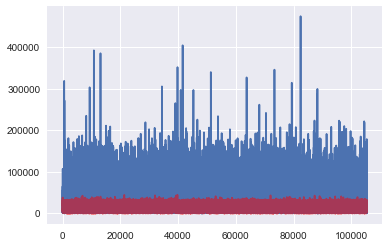

In [42]:
# plotting the actual and prediction 
plt.plot(ytestlr)
plt.plot(clf.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

The result doesn't have any predictive power to actual data. It doesn't capture any peak or normal sale volume.also, the results are too conservative. we will move on to other algorithms.  

### Gradient Boosting Regression

From the previous results, linear regression might not be a good idea to fit the data, so non-linear machine learning model will be used to improve the predictive power. 
I will try three different algorithms in ensemble machine learning since it will provide a better predictive performance that could be obtained from any of the constituents 
learning algorithms alone. 

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state = 16)
GBR.fit(Xlr, ylr)
print("R2: {}".format(GBR.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, GBR.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, GBR.predict(Xtestlr))))

R2: 0.7443482557773745
Mean Abs Error: 6839.562140359068
Mean Sqrt Error: 134037447.67851587


The results indicate huge improvement in predictive performance. R2 is much higher at 0.74. Mean absolute error and mean squared error also drop significantly be more than half. this shows that we are on the right track.

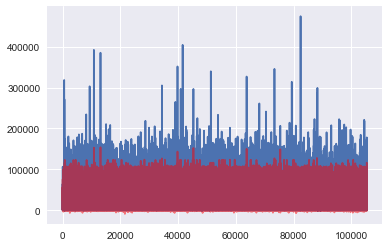

In [44]:
# plotting the actual and prediction 
plt.plot(ytestlr)
plt.plot(GBR.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

Anyway, after visualizing the actual and prediction, the model still preform poorly in the sense of pratical usage.
It does not capture any peak and drop in the data and tent to underpredict sale volume

### Random Forest Regression

Moving to Random Forest Regression, we will continuously apply the algorithm in ensemble family since it improves the predictive performance compared to the linear model. 

In [45]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state = 16)
RF.fit(Xlr, ylr)
print("R2: {}".format(RF.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, RF.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, RF.predict(Xtestlr))))

R2: 0.945749791027987
Mean Abs Error: 1967.6954222102033
Mean Sqrt Error: 28443222.903664485


The result looks nice. R2 is at 0.945. And Mean absolute error drops to one third. we are getting closer.  

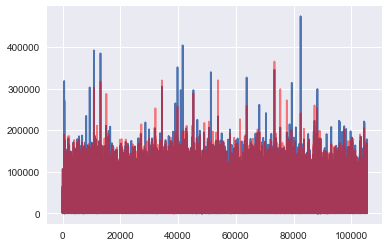

In [46]:
# plotting the actual and prediction 
plt.plot(ytestlr)
plt.plot(RF.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

Plotting the result visually shows that this model captures some peak and drop more accurately than the previous, but it cannot predict the spike of the sale volume on holiday which is one of the most important questions
that we want to capture. According to the limitation of time and computational power (My laptop has only 4 GB of RAM), I will skip hyperparameter tuning process which requrie a lot of juice. 

### Bagging Regression

Since we captured some nice result from the previous model, I will try to use the algorithm from the same family with the similar algorithem. Bagging regression is a combination of bootstrapping method and random forest algorithm. It might improve the predictive power.

In [47]:
from sklearn.ensemble import BaggingRegressor
BG = BaggingRegressor(random_state = 16)
BG.fit(Xlr, ylr)
print("R2: {}".format(BG.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, BG.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, BG.predict(Xtestlr))))

R2: 0.9449659632063235
Mean Abs Error: 1971.5636061408254
Mean Sqrt Error: 28854181.494831685


The result is similar to Random forest regression with a little improvement. 

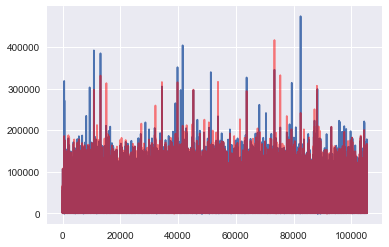

In [15]:
plt.plot(ytestlr)
plt.plot(BG.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

From the graph above, the result share the same nice properties to the previous one but bagging regression tent to be less conservative compared to random forest regression. In my opinion, being a little aggrassive on sale prediction is better than conservative because sale prediction can be used to order inventory, manage employee on duty and be a source of financial report. 
Liquidity in inventory is always better than losing customers with a potential buying opportunity. More staffs on duty are always better than customers receiving bad experience on their holidays. 
And, a slightly positive financial report is not anything new anyways. Therefore, I will pick this model over other models.
However, the model still under predict a lot of spike in sale volume. There is still a room to improve.

## Addding more time dummies and time lags

The idea of adding more time dummies and time lags is to test 
whether these variables will improve the predictive power or not. 
I will create new features according to day, month, year. It should improve the result 
since there is a peak and low window period for department store. Also, the 
time lag of sales volume can play a critical row to prediction. 

In [48]:
# create new columns for day month year 
train_full['Date'] = pd.to_datetime(train_full['Date'])
train_full['Date_dayofweek'] = train_full['Date'].dt.dayofweek
train_full['Date_month'] = train_full['Date'].dt.month
train_full['Date_year'] = train_full['Date'].dt.year
train_full['Date_day'] = train_full['Date'].dt.day
# create time lag
for days_to_lag in [1, 2, 3, 5, 7, 14, 30]:
    train_full['Weekly_sales_lag_{}'.format(days_to_lag)] = train_full.Weekly_Sales.shift(days_to_lag)
train_full= train_full.fillna(0)

### Fitting the model 

### Linear regression 

In [53]:
features = train_full.drop(['Date','Weekly_Sales'],axis = 1)
features = pd.get_dummies(features, columns=['Type'])
features[['IsHoliday']] = features[['IsHoliday']].replace(False,0)
features[['Isholiday']] = features[['IsHoliday']].replace(True,1)
y = train_full.Weekly_Sales
Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
clf = LinearRegression()
clf.fit(Xlr, ylr)
print("R2: {}".format(clf.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, clf.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, clf.predict(Xtestlr))))

R2: 0.23227251821904246
Mean Abs Error: 12686.701689478205
Mean Sqrt Error: 402517230.9443085


The result is better compared to using the original feature. 
R2 is double. MAE and MSE drop. Good sight for improvement. 

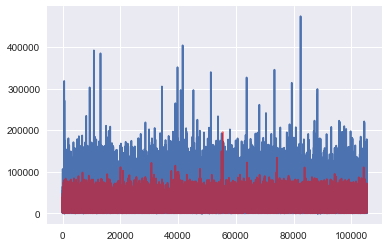

In [54]:
plt.plot(ytestlr)
plt.plot(clf.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

### Gradient Boosting Regression 

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state = 16)
GBR.fit(Xlr, ylr)
print("R2: {}".format(GBR.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, GBR.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, GBR.predict(Xtestlr))))

R2: 0.7528908326833574
Mean Abs Error: 6880.4195041624425
Mean Sqrt Error: 129558600.06275977


The result is better compared to using the original feature. 
R2 is double. MAE and MSE drop. 

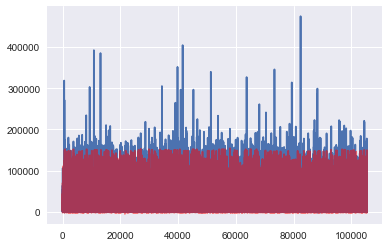

In [56]:
plt.plot(ytestlr)
plt.plot(GBR.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

### Random Forest Regression

In [57]:
RF = RandomForestRegressor(random_state = 16)
RF.fit(Xlr, ylr)
print("R2: {}".format(RF.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, RF.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, RF.predict(Xtestlr))))

R2: 0.9684455731803806
Mean Abs Error: 1607.9131556080574
Mean Sqrt Error: 16543891.952394433


The result is better compared to using the original feature. R2 is double. MAE and MSE drop.


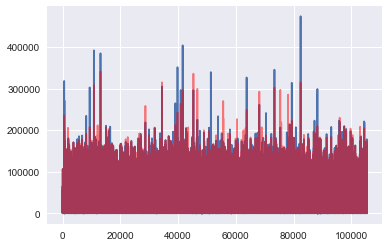

In [58]:
plt.plot(ytestlr)
plt.plot(RF.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

The graph indicates that our model performs better in capturing peak. Therefore, the features that are newly included actually improve the predictive power. 

### Bagging Regression

In [59]:
from sklearn.ensemble import BaggingRegressor
BG = BaggingRegressor(random_state = 16)
BG.fit(Xlr, ylr)
print("R2: {}".format(BG.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, BG.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, BG.predict(Xtestlr))))

R2: 0.969456005246337
Mean Abs Error: 1604.9827893408483
Mean Sqrt Error: 16014125.431203067


The result is quite closed to random forest model. 

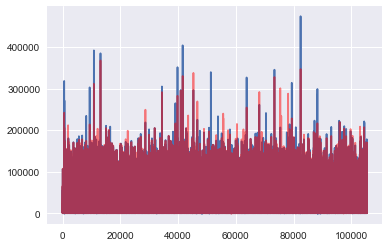

In [60]:
plt.plot(ytestlr)
plt.plot(BG.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

Also, the graph is quite similar but it still show slightly overprediction compared to random forest.  

## Converting store and department as dummy 

From the previous section, adding the meaningful features can actually improve the model, so the question is that how
the model will be improved if we convert store and department into dummy variables. Can linear regression preform better in the level of resemble algorithm?
will this modification be beneficial to begging algorithm? However, I cannot perform this section due to limited computational power.
It keeps crashing my good old friend since there are too many features to handle. Therefore, I will show how to create dummies but not run it.  

In [ ]:
#train_full = pd.get_dummies(train_full, columns=['Store', 'Dept'])

In [ ]:
#train_full 

In [ ]:
#features = train_full.drop(['Date','Weekly_Sales'],axis = 1)
#features = pd.get_dummies(features, columns=['Type'])
#features[['IsHoliday']] = features[['IsHoliday']].replace(False,0)
#features[['Isholiday']] = features[['IsHoliday']].replace(True,1)
#y = train.Weekly_Sales
#Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
#RF = RandomForestRegressor(random_state = 16)
#RF.fit(Xlr, ylr)
#print("R2: {}".format(RF.score(Xtestlr, ytestlr)))
#print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, RF.predict(Xtestlr))))
#print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, RF.predict(Xtestlr))))

In [ ]:
#clf = LinearRegression()
#clf.fit(Xlr, ylr)
#print("R2: {}".format(clf.score(Xtestlr, ytestlr)))
#print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, clf.predict(Xtestlr))))
#print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, clf.predict(Xtestlr))))

## Do it one by one

This is also another approach by separate each store and department. Then, I will try to apply the algorithm to each table one by one.
The result is quite poor due to a small number of training data, so only the sample of a procedure will be shown.


In [62]:
# extract store and department 
s1d1 = train_full[(train_full['Store'] == 1) & (train_full['Dept'] == 1) ]

In [63]:
X = s1d1.drop(['Date','Weekly_Sales','Dept','Store'],axis = 1)
X = pd.get_dummies(X, columns=['Type'])
X[['IsHoliday']] = X[['IsHoliday']].replace(False,0)
X[['Isholiday']] = X[['IsHoliday']].replace(True,1)
y = s1d1.Weekly_Sales
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values, y.values,random_state=5)
clf = LinearRegression()
clf.fit(Xlr, ylr)
print("R2: {}".format(clf.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, clf.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, clf.predict(Xtestlr))))

R2: 0.24104085332377556
Mean Abs Error: 5287.402842292901
Mean Sqrt Error: 59385124.06987359


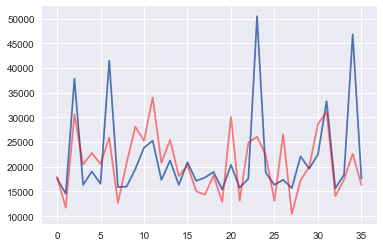

In [64]:
plt.plot(ytestlr)
plt.plot(clf.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

In [65]:
RF = RandomForestRegressor(random_state = 16)
RF.fit(Xlr, ylr)
print("R2: {}".format(RF.score(Xtestlr, ytestlr)))
print("Mean Abs Error: {}".format(mean_absolute_error(ytestlr, RF.predict(Xtestlr))))
print("Mean Sqrt Error: {}".format(mean_squared_error(ytestlr, RF.predict(Xtestlr))))

R2: -0.5456379728158922
Mean Abs Error: 6998.500916666668
Mean Sqrt Error: 120939187.81367135


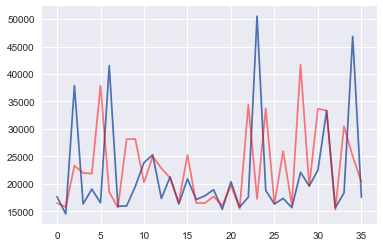

In [66]:
plt.plot(ytestlr)
plt.plot(RF.predict(Xtestlr), color = 'red', alpha = 0.5)
plt.show()

## Summary 

In this project, we first explored the dataset which has to be merge and fill up some missing value. 
Then, we applied some cleaning and manipulating techniques preparing the data. 
After that, we applied several supervised machine learning models to fit the data. 
This is what we found from the project. 

Modeling Conclusions:

After exploring all datasets, we used four different supervised regression algorithms
(Linear Regression, Gradient Boosting Regression, Random Forest Regression and Begging Regression) and feature engineering procedure to
train the predictive model by using 70% of the whole data. The remaining 30% was used to evaluate the model.
1. Using various performance evaluation metrics, we found that the Random forest regression and begging regression give
the best model performance in term of predictability.
2. We used the begging regression model to apply to the data because of the combination of its performance and properties related to retail business(inventory management, customer experience, and financial report). 
3. We achieved R2 at 0.969456005246337, Mean Abs Error at 1604.9827893408483 and Mean Sqrt Error at 16014125.431203067
4. In terms of features, we found that including time lag and time dummies improve predictive score 

